# Time Series + Fuzzy logic

In [29]:
import pandas 
import statsmodels 
import matplotlib

In [30]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('../resources/Top 100 Crypto Coins/bitcoin.csv')

# Ensure the data has a datetime index and a single time series column
data['Date'] = pd.to_datetime(data['Date'])  # Assuming a 'Date' column
data.set_index('Date', inplace=True)

# Preview the data
print(data.head())

            Open  High  Low  Close  Volume Currency
Date                                               
2010-07-18   0.0   0.1  0.1    0.1      75      USD
2010-07-19   0.1   0.1  0.1    0.1     574      USD
2010-07-20   0.1   0.1  0.1    0.1     262      USD
2010-07-21   0.1   0.1  0.1    0.1     575      USD
2010-07-22   0.1   0.1  0.1    0.1    2160      USD


### Visualization

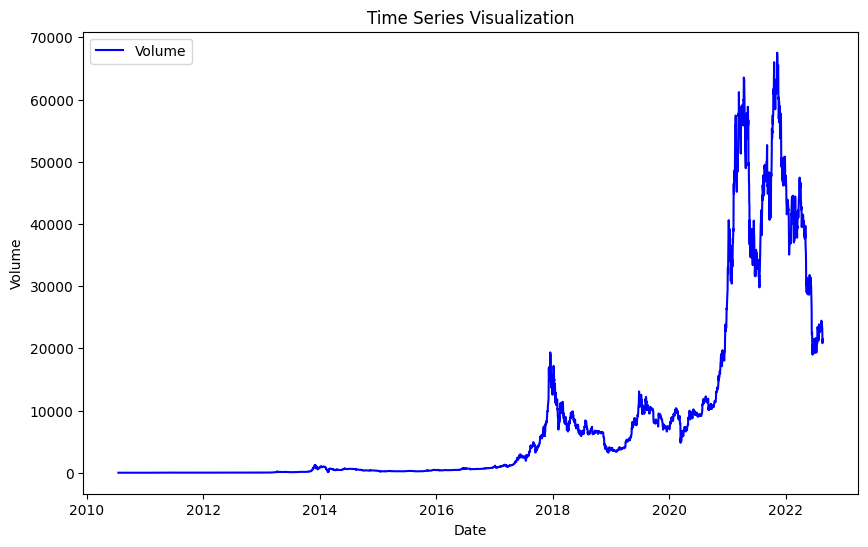

In [31]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Open'], label='Volume', color='blue')
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [32]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Open'])  # Replace 'Value' with your time series column name
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("Time series is not stationary.")
else:
    print("Time series is stationary.")

ADF Statistic: -1.744515420043839
p-value: 0.4083349216943971
Time series is not stationary.


In [33]:
print(data[:0])

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Currency]
Index: []


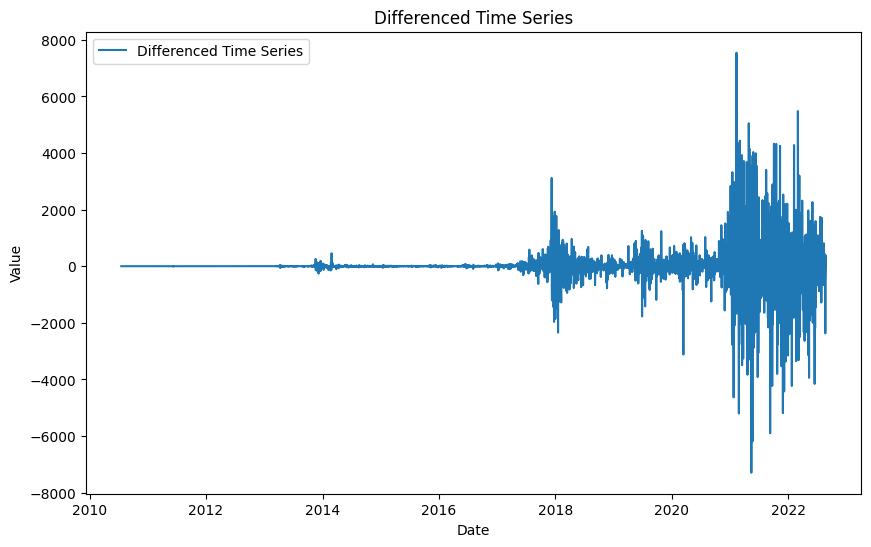

In [ ]:
data['Open'] = data['Open'].astype(int)
data['High'] = data['High'].astype(int)
data['Low'] = data['Low'].astype(int)
data['Close'] = data['Close'].astype(int)
data['Volume'] = data['Volume'].astype(int)

# Before running, uncomment this line and run it once:
# data = data.drop('Currency', axis=1)

# data = data[0:]

data_diff = data.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(data_diff['Open'], label='Differenced Time Series')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

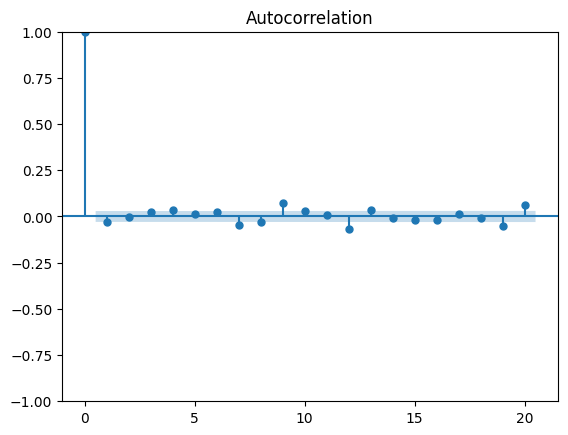

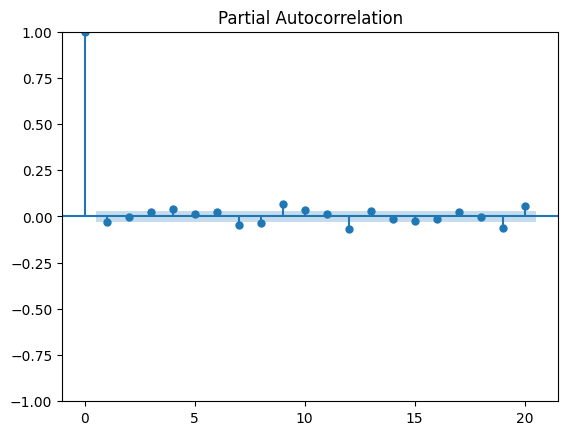

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plot_acf(data_diff['Open'], lags=20)
plt.show()

# PACF plot
plot_pacf(data_diff['Open'], lags=20)
plt.show()

In [50]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(data['Open'], order=(2, 1, 2))  # Replace (p, d, q) with identified values
result = model.fit()

# Model summary
print(result.summary())

c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 4420
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -34900.417
Date:                Mon, 13 Jan 2025   AIC                          69810.834
Time:                        21:10:17   BIC                          69842.802
Sample:                    07-18-2010   HQIC                         69822.108
                         - 08-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8155      0.009     95.223      0.000       0.799       0.832
ar.L2         -0.9282      0.007   -126.884      0.000      -0.943      -0.914
ma.L1         -0.8537      0.008   -104.403      0.0

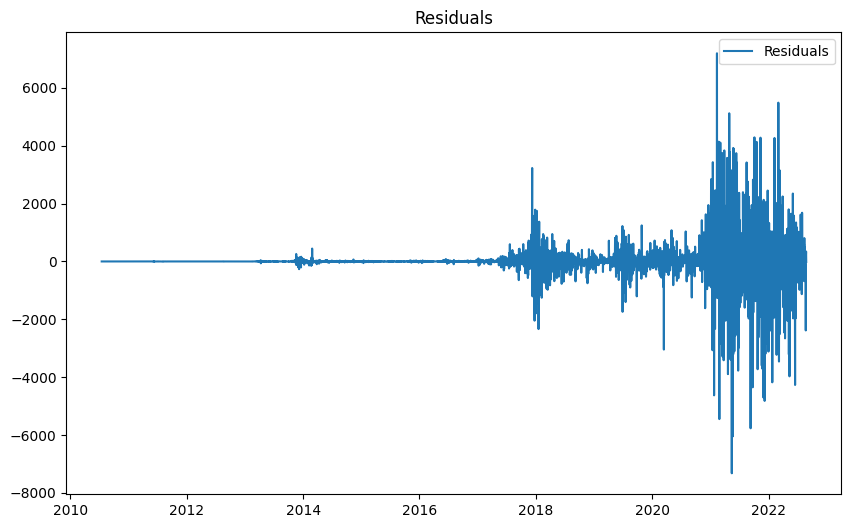

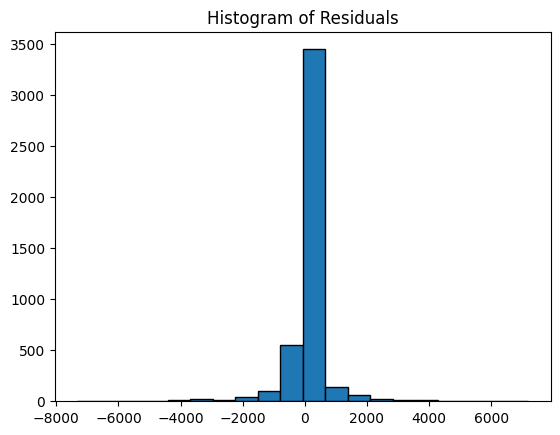

In [51]:
# Plot residuals
residuals = result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals')
plt.legend()
plt.show()

# Plot histogram of residuals
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Histogram of Residuals')
plt.show()

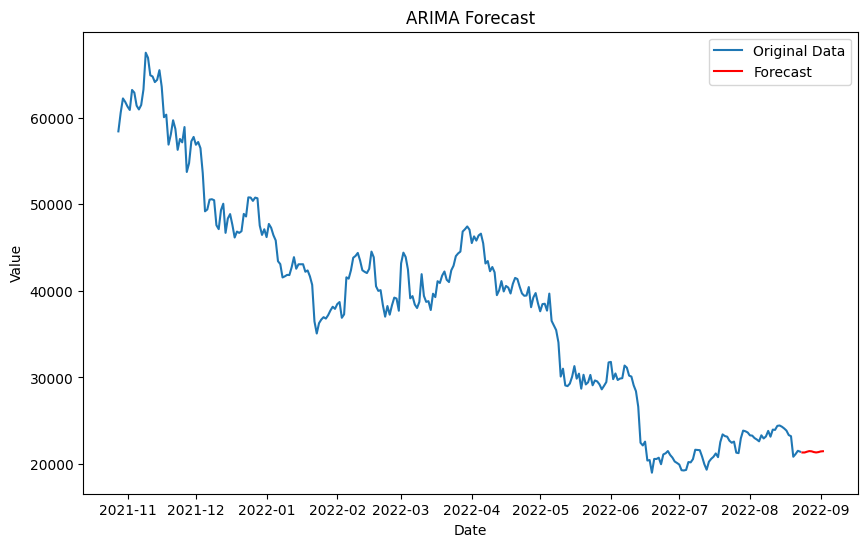

In [ ]:
# Forecast the next 10 steps
forecast = result.forecast(steps=10)


# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data[-300:]['Open'], label='Original Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Next time:
- take interval 3 months, make predictions from 2 months for the third month
- fuzzy logic how to apply
- read more on ARIMA and other models

## Exponential Smoothing

$F_{t+1} = α * Y_t + (1 — α) * F_t$

alpha 0.5
10 -> 10
15 -> 0.5\*10 + 15\*0.5 = 12.5
25 
20
15
5


c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


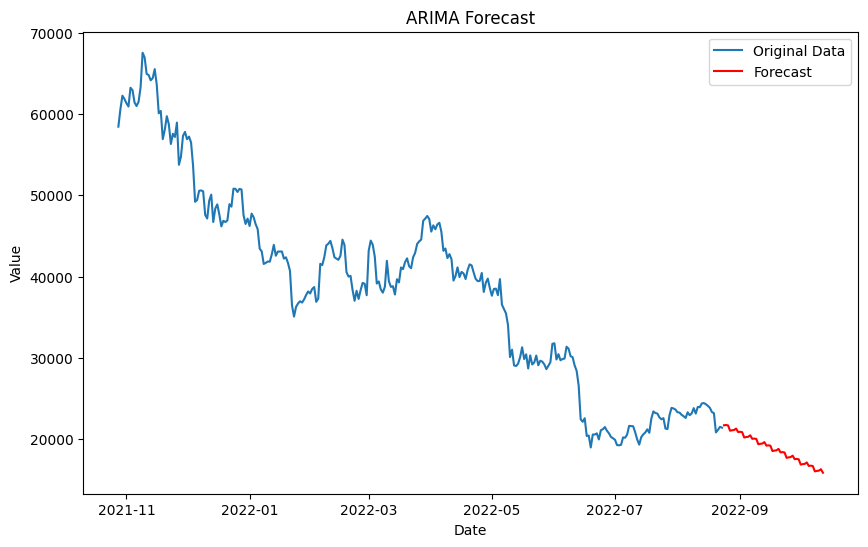

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('../resources/Top 100 Crypto Coins/bitcoin.csv')

# Ensure the data has a datetime index and a single time series column
data['Date'] = pd.to_datetime(data['Date'])  # Assuming a 'Date' column
data.set_index('Date', inplace=True)

# Apply Holt-Winters Exponential Smoothing (trend + seasonality)
model = ExponentialSmoothing(data['Open'], trend='add', seasonal='add', seasonal_periods=7)
fit = model.fit(smoothing_level=0.2, smoothing_trend=0.1, smoothing_seasonal=0.3, optimized=False)

# Forecast for next 50 days
forecast = fit.forecast(steps=50)


# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data[-300:]['Open'], label='Original Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Exponential Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [7]:
print(len(data))

4420


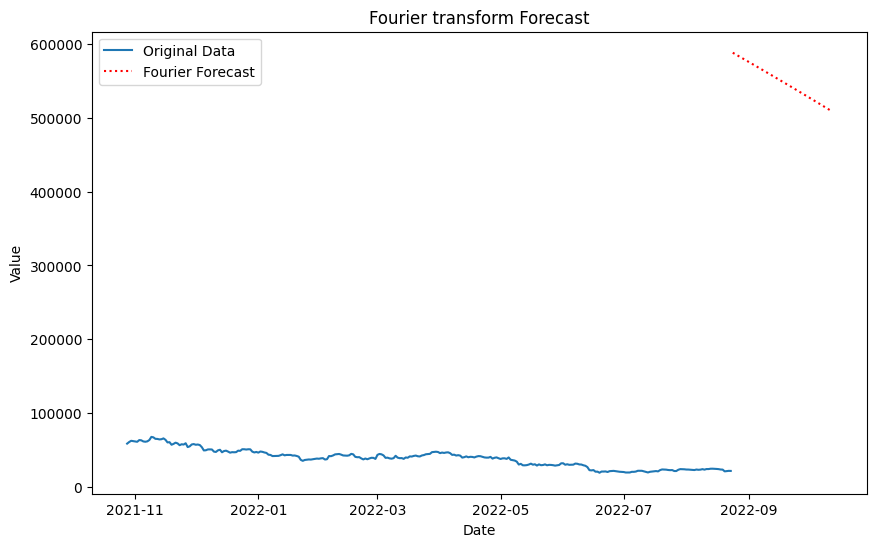

In [28]:
from scipy.fftpack import fft, ifft, fftfreq
import numpy as np

# df = pd.DataFrame({'Time': t, 'Value': y})


# 🔹 Step 2: Apply Fast Fourier Transform (FFT)
fft_result = fft(np.array(data['Open']))  # Compute FFT
frequencies = fftfreq(len(data))  # Compute frequency bins


magnitude = np.abs(fft_result)  # Magnitude spectrum
top_k = 5  # Select top 5 most dominant frequencies
indices = np.argsort(magnitude)[-top_k:]  # Get indices of top frequencies

# 🔹 Step 4: Reconstruct Time Series Using Top Frequencies
filtered_fft = np.zeros_like(fft_result)
filtered_fft[indices] = fft_result[indices]  # Keep only dominant frequencies

reconstructed_signal = ifft(filtered_fft).real  # Inverse FFT to reconstruct signal

# 🔹 Step 5: Forecast Future Points
future_t = np.arange(len(data), len(data) + 50)  # 50 steps into the future
future_signal = np.zeros_like(future_t, dtype=np.float64)
for i in indices:
    amp = np.abs(fft_result[i]) / 50  # Fix: Normalize amplitude
    phase = np.angle(fft_result[i])  # Fix: Include phase shift
    freq = frequencies[i]

    if freq > 0:  # Use only positive frequencies
        future_signal += amp * np.cos(2 * np.pi * freq * future_t + phase)

future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=50, freq='D')

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data[-300:]['Open'], label='Original Data')
# plt.plot(future_signal, label='Forecast', color='red')
plt.plot(future_dates, future_signal, label="Fourier Forecast", linestyle="dotted", color='red')
plt.title('Fourier transform Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

n: 4420


<StemContainer object of 3 artists>

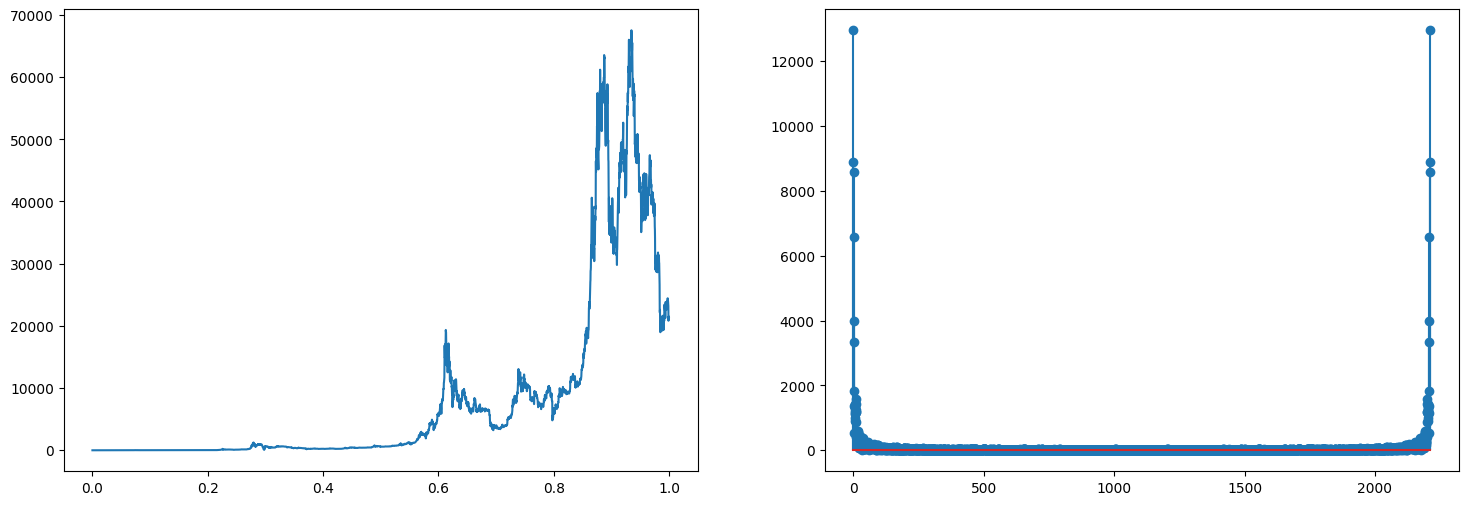

In [41]:
from scipy import fftpack

# Frequency and sampling rate
f = 10 # frequency
Fs = len(data['Open']) # sampling rate
t = np.arange(0,1,1/Fs)

y = np.array(data['Open'])
y_fft = fftpack.fft(data['Open'])

# Plot data
n = np.size(t)
print("n:",n)
fr = Fs/2 * np.linspace(0,1, int(n/1))
y_m = 2/n * abs(y_fft[0:np.size(fr)])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
ax[0].plot(t, y)    # plot time series

#ax[1].stem(fr, y_m) # plot freq domain -- remove 0 to see the detail
ax[1].stem(fr[1:], y_m[1:]) # plot freq domain -- remove 0 to see the detail

In [42]:

fr_3 = fr[0:3]
y_m_3 = y_m[0:3]
print("fr:", fr_3)
print("y_m:", y_m_3)

fr: [0.         0.50011315 1.0002263 ]
y_m: [16603.58144796 12953.00029595  8905.09498295]


n: 4420
len of matchedf: 2009 [36693915.               -0.j         20670985.00936095+19803174.87085355j
  8741790.83038532+17632178.63153594j  2842365.9013803 +18763686.33392254j
 -6302228.12209726+13076669.91530949j -6008561.03819429 +6417921.92555792j
 -6267214.27951886 +3916623.9833259j  -3801040.29014039 -1446604.06109444j
  1177250.5298643   +278932.94393711j  -130970.34270523 +2989823.30138103j]


c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


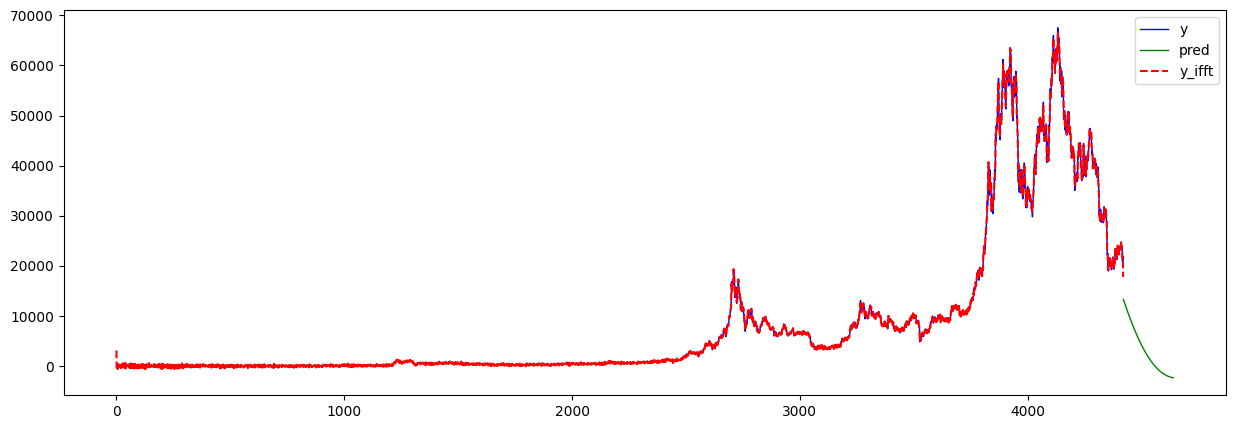

In [45]:
# Inverse FFT from freq domain to original time domain
from scipy import fftpack
from numpy import fft
#print("len y_fft:", type(y_fft), len(y_fft), (y_fft[0:10]))

t = np.arange(0, len(data['Open']))

#y_fft_cut = y_fft[0:99] #filter out a freq to see if it close match 
# try zero low amp freq (noise) -- didn't look just noise, no clear trend
treshold_amp = 16
y_fft_cut = np.zeros(y_fft.size, dtype=np.complex_)

n = np.size(t)
print("n:",n)
fr = Fs/2 * np.linspace(0,1, int(n/1))

matchedf = 0
y_m = 2/n * abs(y_fft[0:np.size(fr)])
for i, f in enumerate(y_fft):
  
  if y_m[i] > treshold_amp: 
    y_fft_cut[i] = f
    matchedf += 1
print("len of matchedf:", matchedf, y_fft_cut[0:10])

inv = fftpack.ifft(y_fft_cut, n=len(y))

# calculate the new data points from the FFT result
n_harm = 8
x_freqdom = y_fft_cut #y_fft
n=len(y)
predsize2=220
f = fft.fftfreq(n)              # frequencies
indexes = list(range(n))
# sort indexes by frequency, lower -> higher
indexes.sort(key=lambda i: np.absolute(f[i]))

t2 = np.arange(0, predsize2)
res2 = np.zeros(t2.size)
for i in indexes[:1 + n_harm * 2]:
    ampli = np.absolute(x_freqdom[i]) / n   # amplitude
    phase = np.angle(x_freqdom[i])          # phase
    res2 += ampli * np.cos(2 * np.pi * f[i] * t2 + phase) 

plt.subplots(figsize=(15,5))
plt.plot(t, y, 'b', label = 'y', linewidth = 1)

plt.plot(np.arange(n, n + predsize2), res2, 'g', label = 'pred', linewidth = 1)

plt.plot(np.arange(0, inv.size), inv, 'r', label = 'y_ifft', linestyle="--")    # plot time series
plt.legend()
plt.show()

### todo:
- read about fft
- make predictions based only last 100 days : 50 days ahead
- apply fuzzy logic : in parameters selection for example, or in harmonics
- make predictions for some existing range and compare: validation

